# Author: Kumar R.

# Decision Tree

## Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic data 
set from Kaggle. This data set provides information on the Titanic 
passengers and can be used to predict whether a passenger survived or 
not.

In [1]:
#load the required library
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
#load the url
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [3]:
#Import the data
titanic = pd.read_csv(url)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#get the information
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Column names
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

I'm using use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch 
(Parents/children aboard), and Fare to predict whether a passenger 
survived.

In [7]:
#Selection of required columns
col = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Survived']

In [8]:
#create a new dataset (data)
data = titanic[col]

In [9]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [10]:
#get the information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


# EDA (Exploratory Data Analysis)

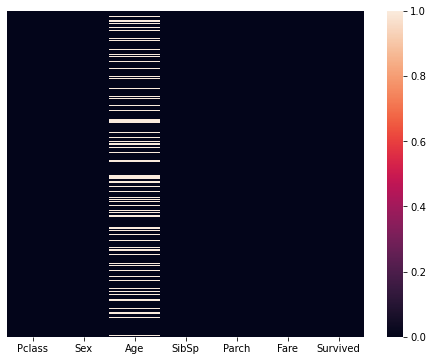

In [11]:
#Check if any missing data in the dataset

missing = data.isnull()
ax = plt.figure(figsize=(8,6))
sb.heatmap(missing ,yticklabels=False )
plt.show()

In [12]:
#percentage of missing data in AGE column.

miss_age = data['Age'].isnull().sum()
print("Number of missing values: ",miss_age)
Percent = (miss_age/(len(data.Age)))*100
print(f'Percentage of missing values: {Percent}')

Number of missing values:  177
Percentage of missing values: 19.865319865319865


In [13]:
for i in range(1,4):
    dummy = data[data.Pclass==i]
    print(f"Average age: {dummy.Age.mean()} when Pclass: {i}")

Average age: 38.233440860215055 when Pclass: 1
Average age: 29.87763005780347 when Pclass: 2
Average age: 25.14061971830986 when Pclass: 3


In [14]:
#creating a function to replace the missing values based on the pclass
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age)==1:
        if Pclass==1:
            return 38
        if Pclass ==2:
            return 30
        else:
            return 25
    else:
        return Age

In [15]:
#Let's apply this on Age column
data['Age']=data[['Age','Pclass']].apply(fill_age, axis=1)

<ipython-input-15-b7e3afa98774>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age']=data[['Age','Pclass']].apply(fill_age, axis=1)


Text(0.5, 1.0, 'Normal Distrubution')

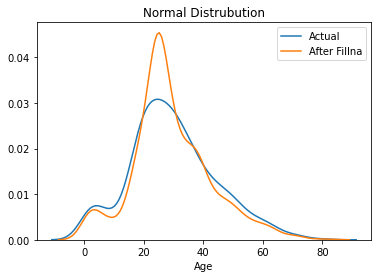

In [19]:
sb.distplot(titanic['Age'],label="Actual",hist=False)
sb.distplot(data['Age'], label='After Fillna', hist=False)
plt.title("Normal Distrubution")

In [20]:
titanic.Age.mean()

29.69911764705882

In [21]:
data.Age.mean()

29.26506172839506

We can observe that the mean of age column is almost same before and after the replacement of missing values. The graph looks similar in both the data.

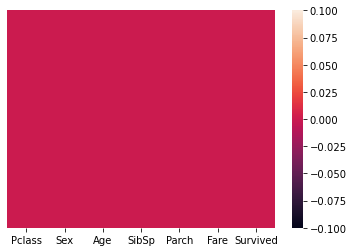

In [22]:
#check any missing value
null = data.isnull()
sb.heatmap(null, yticklabels=False)

There are no missing values in the new dataset. 

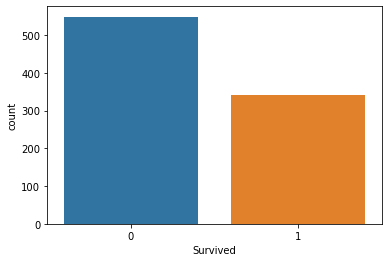

In [23]:
sb.countplot(data['Survived'])

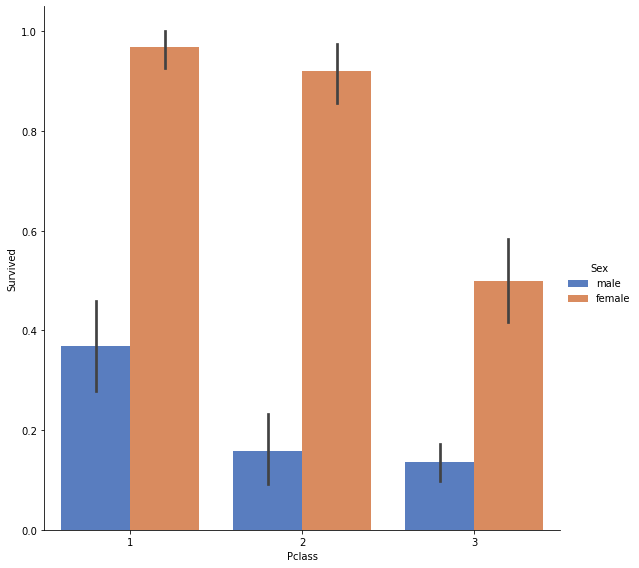

In [24]:
sb.catplot(x='Pclass',y='Survived',data=data,kind='bar',height=8,palette='muted',hue='Sex')

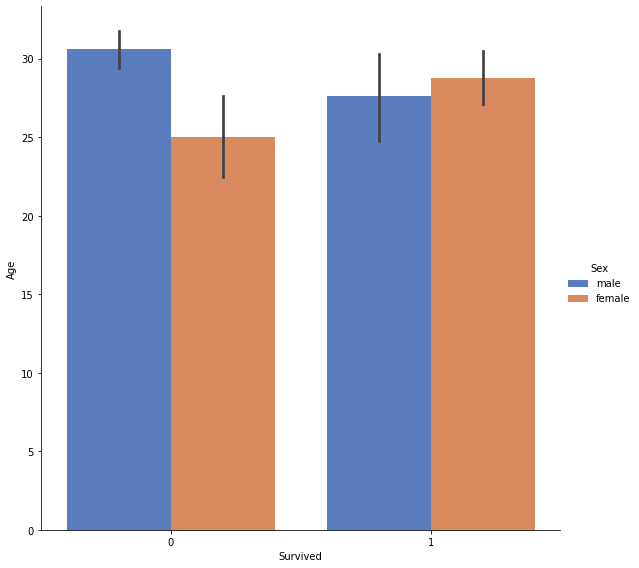

In [25]:
sb.catplot(x='Survived',y='Age',data=data,kind='bar',height=8,palette='muted',hue='Sex')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [27]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
#Converting categorical column into numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data.Sex)

<ipython-input-27-45b910c0e541>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = le.fit_transform(data.Sex)


In [28]:
data.Sex.dtype

dtype('int32')

In [29]:
data.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

The dataset is a unbalanced 

In [30]:
#Seperating the data into features and label
feature = data.iloc[:,0:5].values
label = data.iloc[:,6].values

In [31]:
print(f"Dimension of the feature: {feature.ndim} and the label: {label.ndim}")

Dimension of the feature: 2 and the label: 1


In [32]:
#Model training and testing
from sklearn.model_selection import train_test_split
for i in range(51,150):
    
    x_train,x_test,y_train,y_test = train_test_split(feature, label, test_size=0.2,random_state=i)
    
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier()
    model.fit(x_train,y_train)
    
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    
    if test_score>0.85:
        print(f"test score {test_score}, train score {train_score}, Rs {i}")
    

test score 0.8547486033519553, train score 0.9157303370786517, Rs 130


## Hyper parameter tuning

In [33]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score( estimator=model, X=feature, y=label, cv=10)

In [34]:
print("min score: ",np.min(cv_score))
print("avg score: ",np.average(cv_score))
print("Max score: ",np.max(cv_score))

min score:  0.7111111111111111
avg score:  0.7969538077403245
Max score:  0.8426966292134831


In [35]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [36]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model,
                     param_grid=grid_param,
                     cv=10,
                    n_jobs =-1)

In [37]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [38]:
best_parameters =  grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 4, 'min_samples_split': 4, 'splitter': 'random'}


In [39]:
grid_search.best_score_

0.8230438184663538

In [40]:
#Model training and testing with maxdepth 7
from sklearn.model_selection import train_test_split
for i in range(0,150):
    
    x_train,x_test,y_train,y_test = train_test_split(feature, label, test_size=0.2,random_state=i)
    
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(max_depth=7,
                                   min_samples_leaf=4,
                                   min_samples_split=4)
    model.fit(x_train,y_train)
    
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    
    if test_score>0.85:
        print(f"test score {test_score}, train score {train_score}, Rs {i}")
    

test score 0.8547486033519553, train score 0.8623595505617978, Rs 0
test score 0.888268156424581, train score 0.8455056179775281, Rs 18
test score 0.8659217877094972, train score 0.8539325842696629, Rs 29
test score 0.8547486033519553, train score 0.8497191011235955, Rs 34
test score 0.8603351955307262, train score 0.8525280898876404, Rs 42
test score 0.8659217877094972, train score 0.8497191011235955, Rs 45
test score 0.8603351955307262, train score 0.851123595505618, Rs 46
test score 0.8715083798882681, train score 0.8553370786516854, Rs 74
test score 0.8547486033519553, train score 0.848314606741573, Rs 83
test score 0.8603351955307262, train score 0.8497191011235955, Rs 88
test score 0.8547486033519553, train score 0.8426966292134831, Rs 90
test score 0.8659217877094972, train score 0.8525280898876404, Rs 93
test score 0.8659217877094972, train score 0.8553370786516854, Rs 115
test score 0.8603351955307262, train score 0.8623595505617978, Rs 123
test score 0.8603351955307262, train

In [41]:
#Kfold method to get the best training and testing dataset
#Initialize the algo
from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier(max_depth=6)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=93, shuffle=True)

i=0
for train, test in kfold.split(feature):
    i = i+1
    
    x_trains,x_tests = feature[train],feature[test]
    y_trains,y_tests = label[train],label[test]
    
    model_1.fit(x_trains,y_trains)
    
    if model_1.score(x_tests,y_tests) >= 0.85:
        print("Test Score: {}, train score: {}, for Sample Split: {}".format(model.score(x_tests,y_tests),model.score(x_trains,y_trains),i))
    

Test Score: 0.9, train score: 0.8564294631710362, for Sample Split: 1
Test Score: 0.9101123595505618, train score: 0.8553615960099751, for Sample Split: 2
Test Score: 0.8764044943820225, train score: 0.8591022443890274, for Sample Split: 3


In [42]:
#Initialize the algo
from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier(max_depth=6)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=93, shuffle=True)

i=0
for train, test in kfold.split(feature):
    i = i+1
    if i==2:
        
        x_trains,x_tests = feature[train],feature[test]
        y_trains,y_tests = label[train],label[test]
    
        model_1.fit(x_trains,y_trains)
    
        if model_1.score(x_tests,y_tests) >= 0.85:
            print("Test Score: {}, train score: {}, for Sample Split: {}".format(model.score(x_tests,y_tests),model.score(x_trains,y_trains),i))
    

Test Score: 0.9101123595505618, train score: 0.8553615960099751, for Sample Split: 2


## Prediction and Classification report 

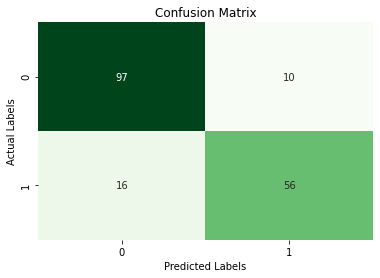

In [43]:
predict = model_1.predict(x_test)

from sklearn. metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
ax = plt.subplot()
sb.heatmap(cm, cbar=False,ax=ax,fmt='g', annot=True,cmap='Greens' )
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [44]:
from sklearn.metrics import classification_report
report =  classification_report(y_test, predict)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       107
           1       0.85      0.78      0.81        72

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.85      0.85      0.85       179



## Area Under Curve

In [45]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix
auc = roc_auc_score(y_test, predict)
print(f'Roc_Auc_Score : {roc_auc_score(y_test,predict)}')

Roc_Auc_Score : 0.842159916926272


In [46]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test,predict)

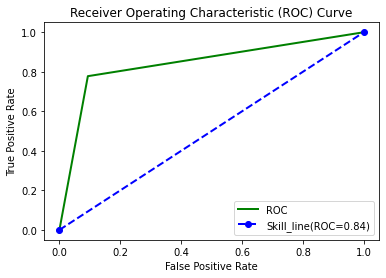

In [47]:
plt.plot(fpr, tpr, 'g', Linewidth=2, label='ROC')
plt.plot([0,1],[0,1], 'bo--', linewidth=2, label='Skill_line(ROC=%0.2f)'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Deployment

In [48]:
import pickle
pickle.dump(model_1, open("Decision_tree.model", 'wb'))

## Done!